# Stack OverFlow developer survey analysis of year 2019 and 2020

### Import statement 

In [27]:
import pandas as pd
import numpy as np
import sys
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot, plot
# pio.renderers.default = "png"
# jupyter setup
init_notebook_mode(connected=True)

### For the graph to be interative

In [38]:
INTERATIVE_MODE = 1
if INTERATIVE_MODE:
    display_as = ''
else:
    display_as = 'png'

###  importing the CSV files

In [3]:
df_2019 = pd.read_csv('dataset/developer_survey_2019/survey_results_public.csv', index_col='Respondent')
df_2020 = pd.read_csv('dataset/developer_survey_2020/survey_results_public.csv', index_col='Respondent')
lang_list = ['Python', 'JavaScript', 'Java', 'HTML/CSS', 'C++', 'C', 'C#', 'Go','Bash/Shell/PowerShell', 'SQL', 'TypeScript', 'R', 'PHP', 'Ruby', 'Assembly', 'Rust','VBA', 'WebAssembly', 'Other(s):' ,'Swift', 'Kotlin', 'Erlang', 'Elixir', 'Clojure','Objective-C','Scala','F#','Dart', 'Perl', 'Julia','Haskell']
entries_in_2019 = len(df_2019)
entries_in_2020 = len(df_2020)

### Function to calculate the percentage of language, that is know by the users

In [10]:
def calculate_percentage_of_languages(df, total_entries, langs):
    language_percentages = {}
    for language in langs:
        filt = df['LanguageWorkedWith'].str.contains(language , na=False)
        no_of_devs_who_knows_the_language = len(df.loc[filt, 'LanguageWorkedWith'])
        language_percentages[language] = no_of_devs_who_knows_the_language/total_entries*100
    return language_percentages

In [5]:
selected_languages = [ 'C','Java','JavaScript','Python', 'C#', 'Go', 'R', 'Swift']
language_percentage_2019 = calculate_percentage_of_languages(df_2019, entries_in_2019, selected_languages)
language_percentage_2020 = calculate_percentage_of_languages(df_2020, entries_in_2020, selected_languages)

### Creating a DataFrame for a particular languages

In [6]:
language_df = pd.DataFrame(data=[language_percentage_2019,language_percentage_2020],index=['2019','2020'])
t_language_df = language_df.T
t_language_df

,2019,2020
C,80.991866,72.553947
Java,78.882351,70.971595
JavaScript,66.625789,60.225563
Python,41.001091,39.228371
C#,30.486145,27.987465
Go,8.101662,7.815578
R,15.691415,14.416469
Swift,6.462428,5.269853


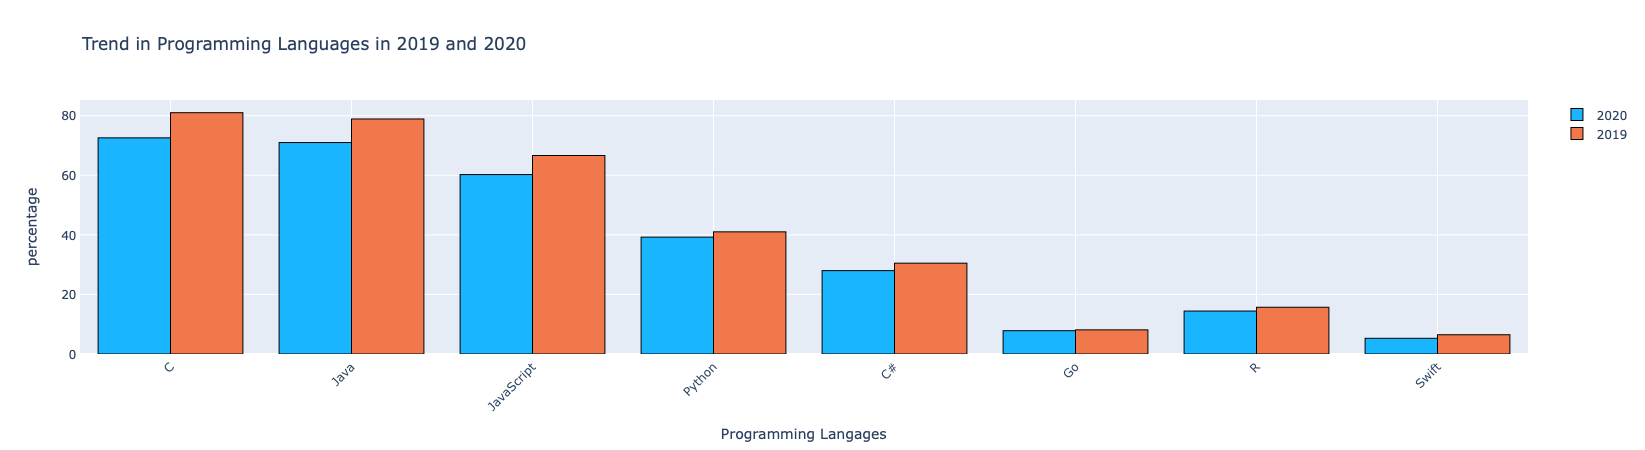

In [39]:
x = t_language_df.index

trace1 = go.Bar(x=x,
                y=t_language_df['2020'],
                name='2020',
                hovertemplate = '%{x}: %{y:.2f}%<extra></extra><br>'+
                '2020',
                marker={'color':'rgba(25,181,254,1)', 'line':{'color':'#000','width':1}}
               )
trace2 = go.Bar(x=x,
                y=t_language_df['2019'],
                hovertemplate = '%{x}: %{y:.2f}%<extra></extra><br>'+
                '2019',
                name='2019',
                marker={'color':'rgba(241,120,75,1)', 'line':{'color':'#000','width':1}}
               )
data = [trace1,trace2]
layout = {
  'xaxis': {'title': 'Programming Langages','tickangle':-45},
  'yaxis': {'title': 'percentage'},
  'barmode': 'group',
  'hoverlabel':{
        'bgcolor':'white', 
        'font_size':16, 
        'font_family':'Rockwell'
    },
  'title': 'Trend in Programming Languages in 2019 and 2020'
};

fig = go.Figure(data, layout)
fig.show(display_as)


### New Languages that Programmers are interested to learn 

In [ ]:
df